In [116]:
!pip install pytest-benchmark

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import pickle
import pytest

# 1. Create datasets

**Qualitative data**

In [152]:
x_1 = np.linspace(0, 10, 100)
y_1  = x_1 + np.random.random(100)*2 - 1
df_1 = pd.DataFrame(x_1, columns=['feature'])

x_2 = np.linspace(0, 10, 100)
y_2  = x_2 + np.random.random(100)*2 - 1
df_2 = pd.DataFrame(x_2, columns=['feature'])

x_3 = np.linspace(0, 10, 100)
y_3  = x_3 + np.random.random(100)*2 - 1
df_3 = pd.DataFrame(x_3, columns=['feature'])

**Visualisation**

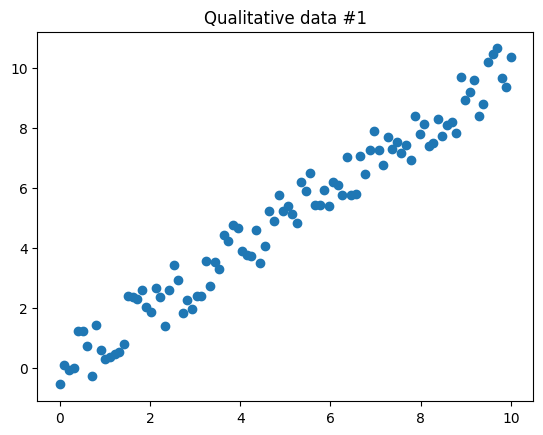

In [84]:
plt.scatter(x_1, y_1)
plt.title("Qualitative data #1")
plt.show()

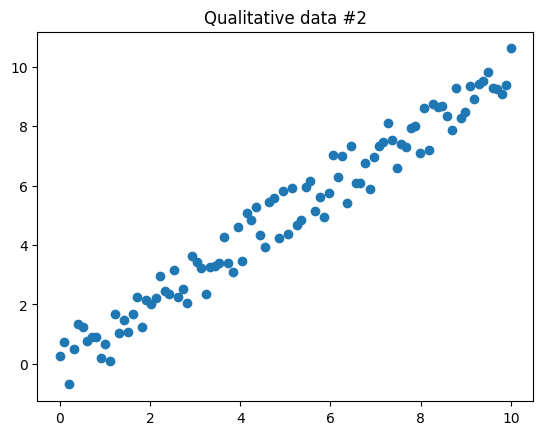

In [85]:
plt.scatter(x_2, y_2)
plt.title("Qualitative data #2")
plt.show()

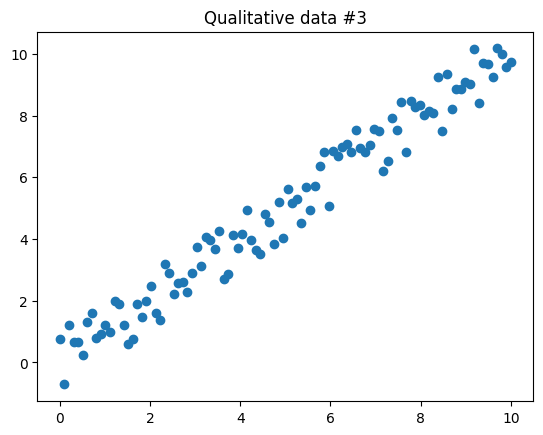

In [86]:
plt.scatter(x_3, y_3)
plt.title("Qualitative data #3")
plt.show()

**Poor quality data**

In [153]:
p_x = np.linspace(0, 100, 100)
p_y  = p_x + np.random.random(100)*20 - 10
p_y[10:30] *= 2
p_y[60:80] /= 2

df_p = pd.DataFrame(p_x, columns=['feature'])

**Visualisation**

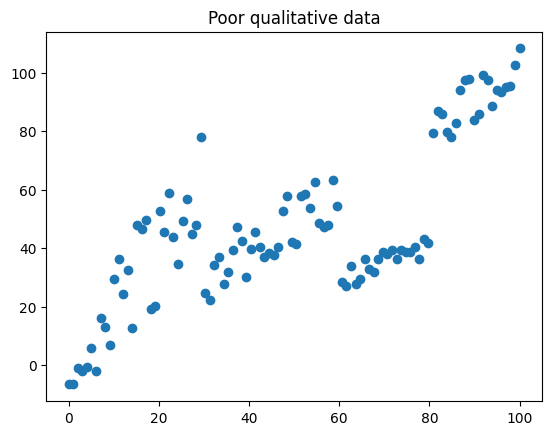

In [88]:
plt.scatter(p_x, p_y)
plt.title("Poor qualitative data")
plt.show()

# 2. Model

In [129]:
def process(df, y):
    # scale data
    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    # Create and fit model
    model = LinearRegression()
    model.fit(X, y)
    return model

In [157]:
model = process(df_1, y_1)

# 3. SAVE DATA AND MODEL

In [158]:
pickle.dump(model, open("model.pkl", 'wb'))

df_1.to_csv("df1.csv", index=False)
pd.DataFrame(y_1, columns=['target']).to_csv("target1.csv", index=False)

df_2.to_csv("df2.csv", index=False)
pd.DataFrame(y_2, columns=['target']).to_csv("target2.csv", index=False)

df_3.to_csv("df3.csv", index=False)
pd.DataFrame(y_3, columns=['target']).to_csv("target3.csv", index=False)

df_p.to_csv("dfp.csv", index=False)
pd.DataFrame(p_y, columns=['target']).to_csv("targetp.csv", index=False)


# СЛЕДУЮЩИЕ СТРОКИ УДАЛИТЬ

In [111]:
preds = model.predict(df_1)
mae, rmse = get_metrics(y_1, preds)
print_metrics(mae, rmse)



MAE : 14.5671
RMSE : 15.6106


In [112]:
preds = model.predict(df_2)
mae, rmse = get_metrics(y_2, preds)
print_metrics(mae, rmse)

MAE : 14.5386
RMSE : 15.6052


In [113]:
preds = model.predict(df_3)
mae, rmse = get_metrics(y_3, preds)
print_metrics(mae, rmse)

MAE : 14.4645
RMSE : 15.5154


In [114]:
preds = model.predict(df_p)
mae, rmse = get_metrics(p_y, preds)
print_metrics(mae, rmse)

MAE : 103.6007
RMSE : 123.2035


In [165]:
%%writefile pytest_benchmark_example.py
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model =  pickle.load(open("model.pkl", 'rb'))
df_1 = pd.read_csv("df1.csv")
df_2 = pd.read_csv("df2.csv")
df_3 = pd.read_csv("df3.csv")
y_1 = pd.read_csv("target1.csv")
y_2 = pd.read_csv("target2.csv")
y_3 = pd.read_csv("target3.csv")

df_p = pd.read_csv("dfp.csv")
y_p = pd.read_csv("targetp.csv")


def get_metrics(target, predictions):
    MAE = mean_absolute_error(target, predictions)
    RMSE = np.sqrt(mean_squared_error(target, predictions))
    return MAE, RMSE


def print_metrics(MAE, RMSE):
    print(f"MAE : {MAE:.4f}")
    print(f"RMSE : {RMSE:.4f}")


def test_second_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_2, rmse_2 = get_metrics(y_2, model.predict(df_2))
    assert abs(mae_standard - mae_2) < 1 and abs(rmse_standard - rmse_2) < 1


def test_third_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_3, rmse_3 = get_metrics(y_3, model.predict(df_3))
    assert abs(mae_standard - mae_3) < 1 and abs(rmse_standard - rmse_3) < 1


def test_poor_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_p, rmse_p = get_metrics(y_p, model.predict(df_p))
    assert abs(mae_standard - mae_p) > 10 and abs(rmse_standard - rmse_p) > 10

Overwriting pytest_benchmark_example.py


In [166]:
!pytest -v pytest_benchmark_example.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
benchmark: 4.0.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /content
plugins: benchmark-4.0.0, nbmake-1.5.3, anyio-3.7.1
collected 3 items                                                                                  

pytest_benchmark_example.py::test_second_model PASSED                                        [ 33%]
pytest_benchmark_example.py::test_third_model PASSED                                         [ 66%]
pytest_benchmark_example.py::test_poor_model PASSED                                          [100%]

========================================= warnings summary =========================================
pytest_benchmark_example.py::test_second_mod